In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [3]:
%matplotlib inline

### 1. Cosenos

In [120]:
class signal:
    
    def __init__(self):
        pass
    #Data
    def create_data(self,T,N):
        self.T=T
        self.N=N
        self.Nint=int(np.floor(N))
        self.h=self.T/self.N #length of intervals

        self.tk=np.array([k*self.h for k in range(0,self.Nint)])
        self.yk=np.array([self.yfun(k*self.h) for k in range(0,self.Nint)])

        #DFT
        self.s=1/self.h #sampling rate
        
        self.Yn=np.array([self.Yfun(n) for n in range(0,int(self.N/2)+1)])
        self.w1=2*np.pi/self.T
        self.wn=np.array([n*self.w1 for n in range(0,int(self.N/2)+1)])
        
        self.tt=np.linspace(0,self.T,400)
        self.yy=np.array([self.yrfun(tm) for tm in self.tt])
        
    def Yfun(self, n):
        suma=0
        for k in range(1,self.Nint+1):
            yk=self.yfun(k*self.h)
            suma+=yk*np.e**((-2*np.pi*1j*k*n)/self.N)/np.sqrt(2*np.pi)
        return suma
    
    #IDFT
    def yrfun(self, t):
        suma=0
        for n in range(1,int(self.N/2)+1):
            wn=n*self.w1
            suma+=2*np.pi/self.T*np.e**(1j*wn*t)/np.sqrt(2*np.pi)*self.Yfun(n)*self.h*2
        return suma

    def yfun(self, t):
        yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
        #yt=100*np.cos(t)
        return yt
    #Plots

    def plot_signal(self):
        plt.figure(figsize=(5,4))
        plt.plot(self.tk,self.yk,'-b',label='Señal de entrada')
        plt.legend(loc='upper right')
        plt.savefig('Inputsignal.png',dpi=300)

    def plot_transformadas(self,num1,num2,text=1):
        ax1=plt.subplot(3,4,num1)
        ax1.plot(self.wn,self.Yn.real,'-b',label='Parte real')
        ax1.plot(self.wn,self.Yn.imag,'-',color='orange',label='Parte imaginaria')
        ax1.legend(loc='upper right')
        plt.title('Transformada de Fourier Discreta',fontsize=14)
        plt.ylabel('$Y_n$',fontsize=14)
        plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        ax2=plt.subplot(3,4,num2)
        ax2.plot(self.tt,self.yy.real,'-b',label='Señal recuperada')
        ax2.plot(self.tk,self.yk,'or',markersize=4,label='Señal de entrada')
        ax2.plot(self.tt,self.yfun(self.tt),'-g',label='Señal real',linewidth=0.6)
        plt.title('Transformada de Fourier Discreta Inversa',fontsize=14)
        plt.ylabel('$y(t)$',fontsize=14)
        plt.xlabel('$t$ [s]',fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(loc='upper right')
        #plt.savefig(f'dft_idft_{text}.png',dpi=300)
        print('T = %.2f [s], N = %.2f, entonces s=%.3f [Hz]'%(self.T,self.N,self.N/self.T))

    def plot_comparison(self):
        plt.figure(figsize=(5,5))
        plt.plot(self.wn,self.h*self.Yn.real,'-b',label='Transformada Discreta')
        ll=np.sqrt(2*np.pi)/2
        ta=np.array([0, 1, 1,    1, 3, 3,    3, 7, 7,    7, 10])
        Ya=np.array([0, 0, 3*ll, 0, 0, 5*ll, 0, 0, 8*ll, 0, 0])
        plt.plot(ta,Ya,'-r',label='Transformada Analitíca',alpha=0.6)
        plt.ylim(-0.2,11.5)
        plt.legend(loc='upper right')
        plt.title('Transformada de Fourier Discreta vs Analítica',fontsize=14)
        plt.ylabel('$\operatorname{Re}\{Y(\omega_n)\}$',fontsize=14)
        plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.savefig('comparison_discrete_analytic.png',dpi=300)
        plt.show()

    def plot_diracs(self,xdata,ydata):    
        m=max(ydata)
        lx=[]; ly=[]
        px=[]; py=[]
        for i,y in enumerate(ydata):
            if abs(y)>m/100:
                lx.append(xdata[i])
                lx.append(xdata[i])
                lx.append(xdata[i])
                ly.append(0)
                ly.append(y)
                ly.append(0)
                px.append(xdata[i])
                py.append(y)
            else:
                lx.append(xdata[i])
                ly.append(y)
        data={'x':lx,'y':ly,'px':px,'py':py}
        return data

    def plot_spectrum(self,text=1):
        plt.figure(figsize=(5.5,4))
        ww=np.arange(0,11,1)
        YY=np.zeros(11)
        Amplitudes=[3,5,8]
        Omegas=[1,3,7]
        for w1 in ww:
            if w1 in Omegas:
                YY[int(w1)]=(np.sqrt(2*np.pi)/2*Amplitudes[Omegas.index(w1)])**2
        data=plot_diracs(ww,YY)
        plt.plot(data['x'],data['y'],color='red',label='Caso analítico',linewidth=1.6,alpha=0.8)
        plt.plot(data['px'],data['py'],'or',markersize=15)
        ii = self.wn<=10
        data=plot_diracs(self.wn[ii],abs(self.h*self.Yn[ii])**2)
        #plt.plot(self.wn[ii],abs(self.h*self.Yn[ii])**2,'-',color='cyan')
        plt.plot(data['x'],data['y'],color='blue',label='Caso discreto',linewidth=1.3,alpha=0.7)
        plt.plot(data['px'],data['py'],'ob',markersize=10,alpha=0.7)
        plt.title('Espectro de potencias $y_1(t)$')
        plt.xlabel('Frecuencia $\omega$ [Hz]')
        plt.ylabel('Potencia $|Y(\omega)|^2$')
        plt.xticks([i for i in range(0,11)],fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend()
        plt.savefig(f'power_spectrum_{text}.png',dpi=300)
        plt.show()

h = 0.157 [s]
T = 6.28 [s], N = 40.00, entonces s=6.366 [Hz]
h = 0.124 [s]
T = 6.28 [s], N = 50.50, entonces s=8.037 [Hz]
h = 0.314 [s]
T = 12.57 [s], N = 40.00, entonces s=3.183 [Hz]
h = 0.249 [s]
T = 12.57 [s], N = 50.50, entonces s=4.019 [Hz]
h = 0.196 [s]
T = 7.85 [s], N = 40.00, entonces s=5.093 [Hz]
h = 0.156 [s]
T = 7.85 [s], N = 50.50, entonces s=6.430 [Hz]


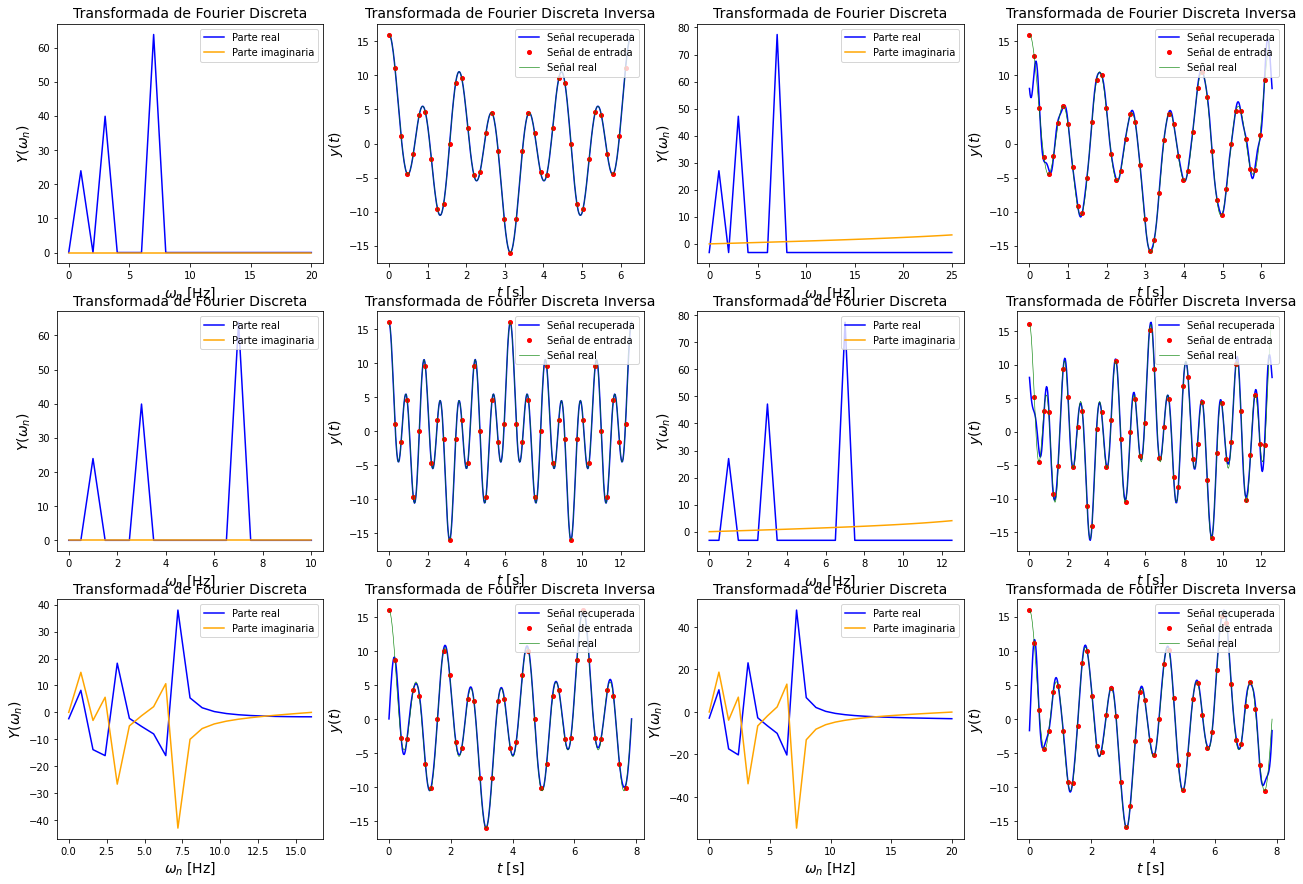

In [96]:
plt.figure(figsize=(22,15))
T=[[2*np.pi, 2*np.pi],[4*np.pi, 4*np.pi],[2*1.25*np.pi,2*1.25*np.pi]]
N=[[40,50.5],[40,50.5],[40,50.5]]

for i in range(3):
    for j in range(2):
        print('h = %.3f [s]'%(T[i][j]/N[i][j]))
        s=signal()
        s.create_data(T[i][j],N[i][j])
        num1=int(1 + 2*j + 4*i)
        num2=int(2 + 2*j + 4*i)
        s.plot_transformadas(num1,num2)
plt.savefig('matrix_TN_1.25.png',dpi=200)

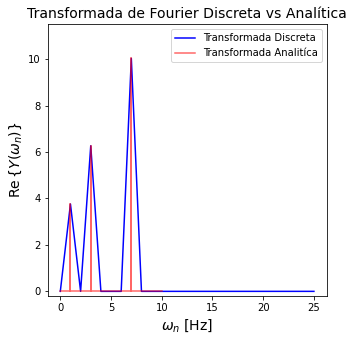

In [23]:
s.plot_comparison()

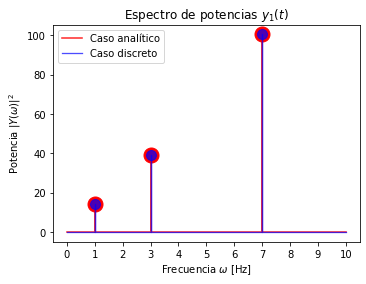

In [27]:
s.plot_spectrum()

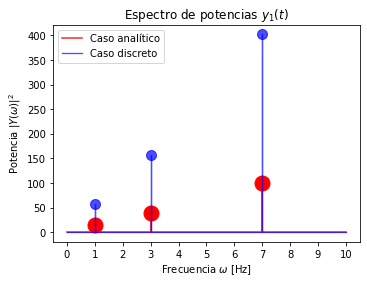

In [123]:
a=2
s=signal()
s.create_data(T=2*np.pi*a,N=40)
s.plot_spectrum(a)
#plt.figure(figsize=(25,10))
#s.plot_transformadas(1,2)

### 2. Senos

In [16]:
T=2*np.pi
N=20

#Data
h=T/N #length of intervals
def yfun(t):
    yt = 3*np.sin(t)+2*np.sin(3*t)+3*np.sin(8*t)
    #yt=100*np.cos(t)
    return yt
tk=np.array([k*h for k in range(0,N)])
yk=np.array([yfun(k*h) for k in range(0,N)])
def plot_signals():
    plt.figure(figsize=(5,4))
    plt.plot(tk,yk,'-b',label='Señal de entrada')
    plt.legend(loc='upper right')
    plt.savefig('Inputsignal_sin.png',dpi=300)

#DFT
s=1/h #sampling rate
def Yfun(n):
    h=T/N
    suma=0
    for k in range(1,N+1):
        yk=yfun(k*h)
        suma+=yk*np.e**((-2*np.pi*1j*k*n)/N)/np.sqrt(2*np.pi)
    return suma
Yn=np.array([Yfun(n) for n in range(0,int(N/2)+1)])
w1=2*np.pi/T
wn=np.array([n*w1 for n in range(0,int(N/2)+1)])

#IDFT
def yrfun(t):
    suma=0
    for n in range(1,int(N/2)+1):
        wn=n*w1
        suma+=2*np.pi/T*np.e**(1j*wn*t)/np.sqrt(2*np.pi)*Yfun(n)*h*2
    return suma
tt=np.linspace(0,T,400)
yy=np.array([yrfun(tm) for tm in tt])

def plot_transformadas():
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(wn,Yn.real,'-b',label='Parte real')
    plt.plot(wn,Yn.imag,'-',color='orange',label='Parte imaginaria')
    plt.legend(loc='upper right')
    plt.title('Transformada de Fourier Discreta',fontsize=14)
    plt.ylabel('$Y_n$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(122)
    plt.plot(tt,yy.real,'-b',label='Señal recuperada')
    plt.plot(tk,yk,'or',markersize=4,label='Señal de entrada')
    plt.plot(tt,yfun(tt),'-g',label='Señal real',linewidth=0.6)
    plt.title('Transformada de Fourier Discreta Inversa',fontsize=14)
    plt.ylabel('$y(t)$',fontsize=14)
    plt.xlabel('$t$ [s]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper right')
    plt.savefig('dft_idft_sin.png',dpi=300)
    plt.show()
    print('T = %.2f [s], N = %.2f, entonces s=%.3f [Hz]'%(T,N,N/T))

def plot_comparison():
    plt.figure(figsize=(6,5))
    plt.plot(wn,h*Yn.imag,'-b',label='Transformada Discreta')
    ll=np.sqrt(2*np.pi)/2
    ta=np.array([0, 1,  1,    1, 3,  3,    3, 8,  8,    8, 10])
    Ya=np.array([0, 0, -3*ll, 0, 0, -2*ll, 0, 0, -3*ll, 0, 0])
    plt.plot(ta,Ya,'-r',label='Transformada Analitíca',alpha=0.6)
    plt.ylim(-4.5,0.25)
    plt.legend(loc='lower right',ncol=2)
    plt.title('Transformada de Fourier Discreta vs Analítica',fontsize=14)
    plt.ylabel('$\operatorname{Im}\{Y(\omega_n)\}$',fontsize=14)
    plt.xlabel('$\omega_n$ [Hz]',fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('comparison_discrete_analytic2.png',dpi=300)
    plt.show()
    
def plot_spectrum():
    plt.figure(figsize=(5.5,4))
    #plt.plot(wn,abs(h*Yn)**2,'-b')
    ww=np.arange(0,11,1)
    YY=np.zeros(11)
    Amplitudes=[3,2,3]
    Omegas=[1,3,8]
    for w1 in ww:
        if w1 in Omegas:
            YY[int(w1)]=(np.sqrt(2*np.pi)/2*Amplitudes[Omegas.index(w1)])**2
    data=plot_diracs(ww,YY)
    plt.plot(data['x'],data['y'],color='red',label='Caso analítico',linewidth=1.6,alpha=0.8)
    plt.plot(data['px'],data['py'],'or',markersize=15)
    ii = wn<=10
    data=plot_diracs(wn[ii],abs(h*Yn[ii])**2)
    plt.plot(data['x'],data['y'],color='blue',label='Caso discreto',linewidth=1.3,alpha=0.7)
    plt.plot(data['px'],data['py'],'ob',markersize=10,alpha=0.7)
    plt.title('Espectro de potencias $y_2(t)$')
    plt.xlabel('Frecuencia $\omega$ [Hz]')
    plt.ylabel('Potencia $|Y(\omega)|^2$')
    plt.xticks([i for i in range(0,11)],fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.savefig('power_spectrum2.png',dpi=300)
    plt.show()

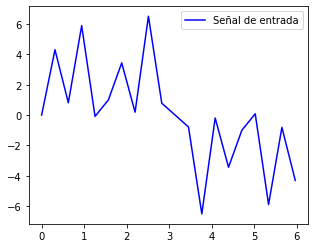

In [17]:
plot_signals()

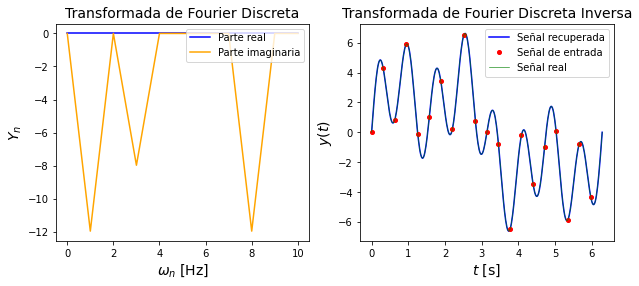

T = 6.28 [s], N = 20.00, entonces s=3.183 [Hz]


In [18]:
plot_transformadas()

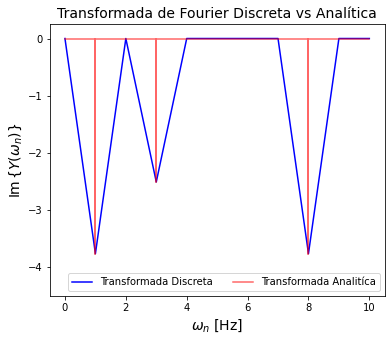

In [19]:
plot_comparison()

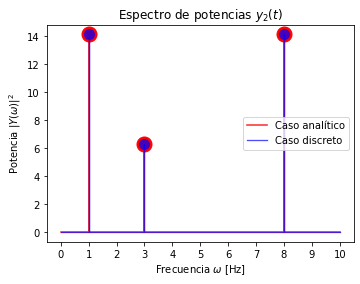

In [20]:
plot_spectrum()

In [21]:
#Señal pura
def yfun(t):
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)
    return yt

#Señal con ruido
def yfun(t):
    np.random.seed(int(t/h))
    yt = 3*np.cos(t)+5*np.cos(3*t)+8*np.cos(7*t)+(np.random.rand()-0.5)*2
    return yt